# Propellant Storage

In [73]:
using PyPlot
using PorousMaterials
PyPlot.matplotlib.style.use("Solarize_Light2")
using CSV
using DataFrames
using JSON

The temperature is 298 K in the atmosphere.

In [2]:
const T = 298.0 # K

298.0

Universal gas constant

In [3]:
const R = 8.3144598e-5 # m³-bar/(K-mol)

8.3144598e-5

Mass desired of xenon propellant. [Source](https://doi.org/10.2514/6.2000-3677) for typical amount of Xe to bring into space: 89 kg

In [4]:
const N = 1000 # mol

1000

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = VdWFluid(::Symbol) at EOS.jl:151
└ @ PorousMaterials C:\Users\Owner\.julia\packages\PorousMaterials\0VxH9\src\EOS.jl:151


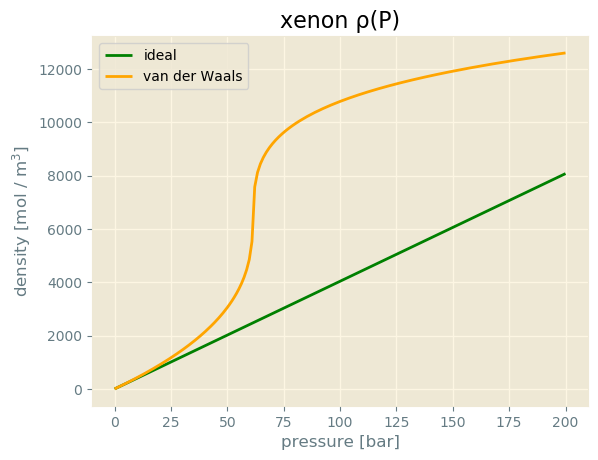

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = VdWFluid(::Symbol) at EOS.jl:154
└ @ PorousMaterials C:\Users\Owner\.julia\packages\PorousMaterials\0VxH9\src\EOS.jl:154
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = VdWFluid(::Symbol) at EOS.jl:155
└ @ PorousMaterials C:\Users\Owner\.julia\packages\PorousMaterials\0VxH9\src\EOS.jl:155


In [5]:
P = 10 .^ range(-2.0, stop=log10(200.), length=501)#[2:end] # bar

# ideal gas density
ρ_ig = P / (R * T) # mol / m³

ρ_vdw = zeros(length(P))
xe = VdWFluid(:Xe)

for (i, p_i) in enumerate(P)
    props = calculate_properties(xe, T, p_i, verbose=false)
    ρ_vdw[i] = props["density (mol/m³)"]
end
    
figure()
plot(P, ρ_ig, color="green", label="ideal")
plot(P, ρ_vdw, color="orange", label="van der Waals")
xlabel("pressure [bar]")
ylabel("density [mol / m\$^3\$]")
legend()
title("xenon ρ(P)")
savefig("Xenon Ideal Gas vs. van der Waals Gas Density.pdf", format="pdf")

For a thin-walled containing a supercritical, pressurized fluid without considering safety factor $\beta$

Assume the tank is made of Kevlar 49 [[Source](http://www.mse.mtu.edu/~drjohn/my4150/props.html)].

In [6]:
const ρ_tank_material = 1470.0 # kg/m³
const σ = 28000.0 # yield strength of Kevlar 49 (bar)

28000.0

Volume of the tank must be equal to the volume of propellant (of course). This allows us to, given a propellant storage density $\rho_p$, compute the radius of the spherical tank needed.

$4/3 \pi  r ^ 3 = m_p / \rho_{vdw}$

In [7]:
r = (N * 3 ./ (4 * π * ρ_vdw)) .^ (1 / 3); # inner radius of tank (m)

Minimum wall thickness required to contain the pressure of supercritical fluid. Thickness is found using the free-body diagram of a spherical, thin-walled tank. By taking the force of the fluid over a cross-sectional area ($P \pi  r ^ 2$) set equal to the force of the tank walls over the circumference, including the yield strength and thickness of the wall ($2 \pi  r \sigma  t$). We then isolate $t$ to solve for the thickness.

\begin{equation}
2 \pi  r \sigma  t=P \pi  r ^ 2
\end{equation}

In [8]:
t_tank_wall = P .* r / (2 * σ); # tank wall thickness (m)

The mass of the tank can be found using the surface area of sphere, the thickness of the sphere, and the density of the material.

In [9]:
m_tank = ρ_tank_material * 4 * π .* r .^ 2 .* t_tank_wall # kg

501-element Array{Float64,1}:
 1.951100972233496 
 1.9510990741088428
 1.9510971380101554
 1.9510951631776599
 1.9510931488363772
 1.9510910941958215
 1.9510889984496838
 1.9510868607755234
 1.9510846803344413
 1.9510824562707478
 1.9510801877116308
 1.951077873766812 
 1.9510755135281952
 ⋮                 
 1.0482976387372633
 1.065031566988243 
 1.0820775649049816
 1.099440381482602 
 1.1171248997529712
 1.1351361359207965
 1.1534792388033694
 1.1721594895456446
 1.191182301586275 
 1.2105532208531684
 1.2302779261699452
 1.2503622298570742

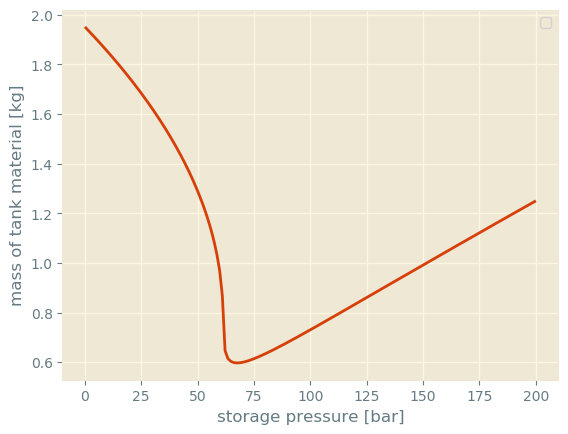

No handles with labels found to put in legend.
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [10]:
figure()
plot(P, m_tank, color=(215/255, 63/255, 9/255))
xlabel("storage pressure [bar]")
ylabel("mass of tank material [kg]")
legend()
# title("Xenon in Kevlar 49")
show()
#savefig("Xenon van der Waals Gas in Pure Kevlar 49.pdf", format="pdf")

Sphere is preferred for storage of high pressure fluids. Theoretically, a sphere would be the best shape of a pressure vessel. However, a spherical shape is tough to manufacture, therefore more expensive, so most pressure vessels are cylindrical with 2:1 semi-elliptical heads or end caps on each end. The drawback to cylindrical types is cylinders are not as strong as spheres due to the weak point at each end.

NOTE: this is using PURE Kevlar 49. Titanium is typically used only as an inner lining with carbon fiber overwrapping* -- [Source](https://doi.org/10.2514/6.2000-3677)
Kevlar 49 is used as 80-90% of the structural integrity of the tank while the lining makes direct contact with the compressed fluid. The lining does provide structural support, but very little compared to the overwrap.

Percent mass is used to measure the adsorption of an isotherm to a mof in many research studies. Percent mass represents the ratio of the mass of the fluid to the mass of the mof plus the mass of the fluid. 
\begin{equation} 
Percent mass = m_{fluid}/ (m_{mof}+m_{fluid})
\end{equation} 
We converted percent mass to the adsorption units of mol/L by dividing the percentage of the ratio by 100 to get the value of the ratio, then multiplying it by 1 mole of the propellant divided by the molar mass of the propellant in grams, then multiplying by 1000 to convert from mol/g to mol/kg, and finally multiplying by the density of the mof crystal in kg/L. 
\begin{equation}
adsorption(mol/L) = m_{fluid}/(m_{mof}+m_{fluid}) * 1/100 * 1 mol_{xe}/131.293 g_{xe} * 1000 g/1 kg * \rho_{mof}
\end{equation}
Density of gas in MOF $(mol_{gas} / L)$ is equal to the adsorption calculated from the above conversion.

In [91]:
file = open(joinpath(PATH_TO_DATA, "isotherms", "10.1016j.micromeso.2012.11.013.isotherm1.json"))
lines = readlines(file)
close(file)
data = JSON.parse(join(lines))
pressure_pts = Array{Float64,1}()
adsorption_pts = Array{Float64,1}()

for datapoints_dict in data["isotherm_data"]
    append!(pressure_pts, datapoints_dict["pressure"])
    append!(adsorption_pts, datapoints_dict["total_adsorption"])
end

pressure_pts

15-element Array{Float64,1}:
 0.15166 
 0.308976
 0.709416
 1.23857 
 1.79632 
 2.15386 
 2.61151 
 3.12636 
 4.05595 
 5.01415 
 5.98664 
 6.95914 
 7.88873 
 8.87553 
 9.91954 

In [11]:
function isotherm_tank(isotherm_filename::AbstractString, MOF::)

PATH_TO_DATA = joinpath(pwd(), "data")
df = open(joinpath(PATH_TO_DATA, "isotherms", "10.1016j.micromeso.2012.11.013.isotherm1.json"); header=126, datarow=127)

,line,pressure,composition (FHNFHKCVQCLJFQ-UHFFFAOYSA-N),adsorption (FHNFHKCVQCLJFQ-UHFFFAOYSA-N)
,Int64,Float64,Int64,Float64
1,1,0.15166,1,0.194152
2,2,0.308976,1,0.46874
3,3,0.709416,1,1.2925
4,4,1.23857,1,2.11626
5,5,1.79632,1,2.94861
6,6,2.15386,1,3.37765
7,7,2.61151,1,3.67798
8,8,3.12636,1,4.01263
9,9,4.05595,1,4.61329


In [12]:
const ρ_mof = 0.555 # kg/L

df[!, :mol_L] = df[!, Symbol("adsorption (FHNFHKCVQCLJFQ-UHFFFAOYSA-N)")] * ρ_mof
showall(df)

┌ Warning: `showall(df::AbstractDataFrame, allcols::Bool=true)` is deprecated, use `show(df, allrows=true, allcols=allcols)` instead.
│   caller = showall(::DataFrame) at deprecated.jl:56
└ @ DataFrames .\deprecated.jl:56


15×6 DataFrame
│ Row │ line  │ pressure │ composition (FHNFHKCVQCLJFQ-UHFFFAOYSA-N) │
│     │ Int64 │ Float64  │ Int64                                     │
├─────┼───────┼──────────┼───────────────────────────────────────────┤
│ 1   │ 1     │ 0.15166  │ 1                                         │
│ 2   │ 2     │ 0.308976 │ 1                                         │
│ 3   │ 3     │ 0.709416 │ 1                                         │
│ 4   │ 4     │ 1.23857  │ 1                                         │
│ 5   │ 5     │ 1.79632  │ 1                                         │
│ 6   │ 6     │ 2.15386  │ 1                                         │
│ 7   │ 7     │ 2.61151  │ 1                                         │
│ 8   │ 8     │ 3.12636  │ 1                                         │
│ 9   │ 9     │ 4.05595  │ 1                                         │
│ 10  │ 10    │ 5.01415  │ 1                                         │
│ 11  │ 11    │ 5.98664  │ 1                                  

In [13]:
#PATH_TO_DATA = joinpath(pwd(), "data")
df_SBMOF1 = CSV.read(joinpath(PATH_TO_DATA, "isotherms", "SBMOF-1_298K.csv"))

,P(mbar),Weight(mg),PercentMass
,Float64,Float64,Float64
1,0.063,36.4861,4.0e-6
2,0.222,36.4888,0.007839
3,0.398,36.51,0.066458
4,0.58,36.5438,0.159596
5,0.803,36.5881,0.281799
6,0.985,36.6281,0.392194
7,4.966,37.4443,2.64343
8,9.976,38.298,4.99974
9,19.99,39.4357,8.14745


In [14]:
frame = Framework("SBMOF-1_cory.cif")
strip_numbers_from_atom_labels!(frame)
const ρ_mof_SB = crystal_density(frame) / 1000 # kg/L

df_SBMOF1[!, :mol_L] = df_SBMOF1[!, :PercentMass] / 100.0 / read_atomic_masses()[:Xe] * 1000 * ρ_mof # mol gas / L  
df_SBMOF1[!, :bar] = df_SBMOF1[!, Symbol("P(mbar)")] / 1000 # bar
df_SBMOF1

,P(mbar),Weight(mg),PercentMass,mol_L,bar
,Float64,Float64,Float64,Float64,Float64
1,0.063,36.4861,4.0e-6,1.69087e-7,6.3e-5
2,0.222,36.4888,0.007839,0.000331369,0.000222
3,0.398,36.51,0.066458,0.0028093,0.000398
4,0.58,36.5438,0.159596,0.00674642,0.00058
5,0.803,36.5881,0.281799,0.0119122,0.000803
6,0.985,36.6281,0.392194,0.0165788,0.000985
7,4.966,37.4443,2.64343,0.111743,0.004966
8,9.976,38.298,4.99974,0.211349,0.009976
9,19.99,39.4357,8.14745,0.344408,0.01999


Compare density of van der Waal gas to gas in a MOF for estimate. 

In [15]:
1/calculate_properties(xe, 298., 1.)["molar volume (L/mol)"]

Xe properties at T = 298.000000 K, P = 1.000000 bar:
	compressibility factor: 0.995117906779058
	fugacity coefficient: 0.9951492697826048
	molar volume (L/mol): 24.65612613988038
	fugacity (bar): 0.9951492697826048
	density (mol/m³): 40.55787167565373


0.04055787167565373

Using the function "fit_adsorption_isotherm" from Porous Materials, we calculated M, the density of gas in the mof at saturation in mol/L, and the langmuir proportionality constant K. The function also extrapolated from the data and created a Langmuir model which is equal to M multiplied by K and Pressure P divided by 1 plus K multiplied by P.
\begin{equation}
L = M KP/(1+KP)
\end{equation} 
The Langmuir model was then fitted to the experimental data and the root mean square was calculated, showing how good of a fit the model is to the experimental data. 

In [16]:
params = fit_adsorption_isotherm(copy(df), :pressure, Symbol("mol_L"), :langmuir)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = fit_adsorption_isotherm(::DataFrame, ::Symbol, ::Symbol, ::Symbol) at Misc.jl:193
└ @ PorousMaterials C:\Users\Owner\.julia\packages\PorousMaterials\0VxH9\src\Misc.jl:193
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = fit_adsorption_isotherm(::DataFrame, ::Symbol, ::Symbol, ::Symbol) at Misc.jl:194
└ @ PorousMaterials C:\Users\Owner\.julia\packages\PorousMaterials\0VxH9\src\Misc.jl:194
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = _guess(::DataFrame, ::Symbol, ::Symbol, ::Symbol) at Misc.jl:143
└ @ PorousMaterials C:\Users\Owner\.julia\packages\PorousMaterials\0VxH9\src\Misc.jl:143
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = _guess(::DataFrame, ::Symbol, ::Symb

Dict{String,Float64} with 3 entries:
  "M"   => 4.1096
  "K"   => 0.363142
  "MSE" => 0.00685528

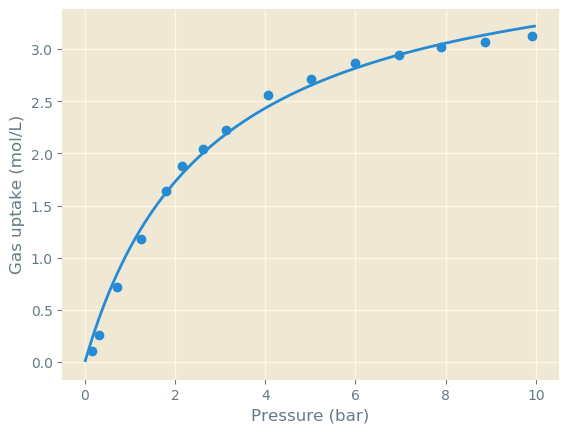

PyObject Text(25.000000000000014, 0.5, 'Gas uptake (mol/L)')

In [17]:
P_fit = range(0.0, stop=10.0, length=100)
N_fit = params["M"] * params["K"] .* P_fit ./ (1 .+ params["K"] .* P_fit)
fig = figure()
scatter(df[!, :pressure], df[!, Symbol("mol_L")])
plot(P_fit, N_fit)
xlabel("Pressure (bar)")
ylabel("Gas uptake (mol/L)")

In [18]:
function ρ_fluid_MOF(P::Array{Float64}, K::Float64, M::Float64) 
    df_mof = Dict{Symbol, Array{Float64}}()
    df_mof[Symbol("P(bar)")] = P
    df_mof[Symbol("Density of Xe in MOF (mol/L)")] = (M * (K .* P)) ./ (1 .+ K .* P)
    return df_mof
end

ρ_fluid_MOF (generic function with 1 method)

In [33]:
df_mof = ρ_fluid_MOF(collect(P), params["K"], params["M"])
df_Xe_density = DataFrame(df_mof)
#CSV.write(df_Xe_density, "Xe_densities_langmuir.csv")
showall(df_Xe_density)

501×2 DataFrame
│ Row │ Density of Xe in MOF (mol/L) │ P(bar)    │
│     │ Float64                      │ Float64   │
├─────┼──────────────────────────────┼───────────┤
│ 1   │ 0.0148697                    │ 0.01      │
│ 2   │ 0.0151661                    │ 0.0102    │
│ 3   │ 0.0154683                    │ 0.0104041 │
│ 4   │ 0.0157766                    │ 0.0106122 │
│ 5   │ 0.0160909                    │ 0.0108245 │
│ 6   │ 0.0164115                    │ 0.011041  │
│ 7   │ 0.0167385                    │ 0.0112619 │
│ 8   │ 0.017072                     │ 0.0114872 │
│ 9   │ 0.017412                     │ 0.011717  │
│ 10  │ 0.0177588                    │ 0.0119514 │
│ 11  │ 0.0181125                    │ 0.0121905 │
│ 12  │ 0.0184732                    │ 0.0124343 │
│ 13  │ 0.0188411                    │ 0.0126831 │
│ 14  │ 0.0192162                    │ 0.0129368 │
│ 15  │ 0.0195988                    │ 0.0131956 │
│ 16  │ 0.019989                     │ 0.0134596 │
│ 17  │ 0.02038

│ 174 │ 0.413074                     │ 0.30772   │
│ 175 │ 0.420492                     │ 0.313876  │
│ 176 │ 0.428027                     │ 0.320155  │
│ 177 │ 0.435682                     │ 0.32656   │
│ 178 │ 0.443457                     │ 0.333092  │
│ 179 │ 0.451354                     │ 0.339756  │
│ 180 │ 0.459374                     │ 0.346552  │
│ 181 │ 0.467518                     │ 0.353485  │
│ 182 │ 0.475787                     │ 0.360556  │
│ 183 │ 0.484184                     │ 0.367769  │
│ 184 │ 0.492708                     │ 0.375126  │
│ 185 │ 0.501362                     │ 0.38263   │
│ 186 │ 0.510147                     │ 0.390284  │
│ 187 │ 0.519063                     │ 0.398092  │
│ 188 │ 0.528112                     │ 0.406055  │
│ 189 │ 0.537295                     │ 0.414178  │
│ 190 │ 0.546614                     │ 0.422464  │
│ 191 │ 0.556069                     │ 0.430915  │
│ 192 │ 0.565662                     │ 0.439535  │
│ 193 │ 0.575393               

│ 349 │ 3.21184                      │ 9.85183   │
│ 350 │ 3.22566                      │ 10.0489   │
│ 351 │ 3.23933                      │ 10.2499   │
│ 352 │ 3.25284                      │ 10.455    │
│ 353 │ 3.26619                      │ 10.6641   │
│ 354 │ 3.27939                      │ 10.8775   │
│ 355 │ 3.29244                      │ 11.095    │
│ 356 │ 3.30533                      │ 11.317    │
│ 357 │ 3.31806                      │ 11.5434   │
│ 358 │ 3.33064                      │ 11.7743   │
│ 359 │ 3.34307                      │ 12.0098   │
│ 360 │ 3.35534                      │ 12.2501   │
│ 361 │ 3.36747                      │ 12.4952   │
│ 362 │ 3.37943                      │ 12.7451   │
│ 363 │ 3.39125                      │ 13.0001   │
│ 364 │ 3.40292                      │ 13.2601   │
│ 365 │ 3.41443                      │ 13.5254   │
│ 366 │ 3.4258                       │ 13.796    │
│ 367 │ 3.43701                      │ 14.0719   │
│ 368 │ 3.44808                

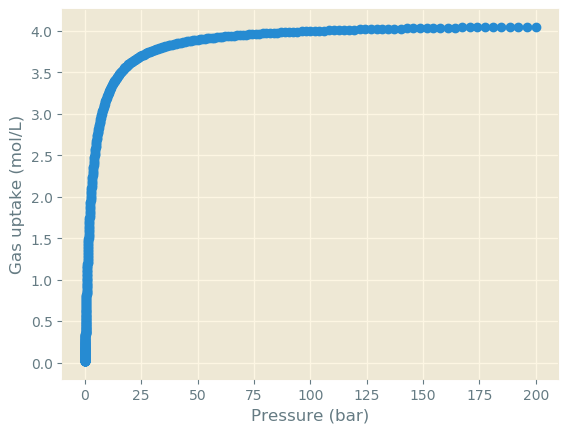

PyObject Text(25.000000000000014, 0.5, 'Gas uptake (mol/L)')

In [20]:
fig = figure()
scatter(P[2:end], df_Xe_density[!, Symbol("Density of Xe in MOF (mol/L)")][2:end])
xlabel("Pressure (bar)")
ylabel("Gas uptake (mol/L)")

Mass of MOF needed to carry desired amount of gas. 
\begin{equation}
m_{mof} = N \rho _{xtal}  / \rho _{fluid}
\end{equation}

In [64]:
m_of_mof = (N * ρ_mof) ./ df_Xe_density[!, Symbol("Density of Xe in MOF (mol/L)")] # kg

501-element Array{Float64,1}:
 37324.18363585898   
 36594.82640714666   
 35879.77340948648   
 35178.74410678734   
 34491.4634648615    
 33817.66184352087   
 33157.074890789176  
 32509.443439189086  
 31874.513404063175  
 31252.035683889204  
 30641.766062550254  
 30043.46511352183   
 29456.898105937613  
     ⋮               
   137.36162762905468
   137.31628225843232
   137.271826206011  
   137.22824203038812
   137.18551263222378
   137.1436212475321 
   137.10255144110437
   137.06228710006076
   137.02281242752903
   136.98411193644696
   136.94617044348604
   136.90897306309498

The volume of the tank storing the mof is equal to the volume of the mof required to store the desired amount of propellant.
\begin{equation}
V_{tank with mof} = m_{mof} / \rho_{mof} = 4/3 \pi r_{tank}^3
\end{equation}


In [22]:
V_tank_with_mof = m_of_mof ./ ρ_mof 

501-element Array{Float64,1}:
 67250.78132587203   
 65936.62415702101   
 64648.24037745311   
 63385.12451673394   
 62146.781017768466  
 60932.724042379945  
 59742.47728070121   
 58575.57376430465   
 57431.5556829967    
 56309.97420520577   
 55210.38930189235   
 54132.3695739132    
 53075.49208277047   
     ⋮               
   247.49842816045887
   247.41672478996813
   247.3366237946144 
   247.25809374844704
   247.18110384184462
   247.1056238694272 
   247.03162421820605
   246.9590758559653 
   246.88795031987212
   246.81821970530982
   246.74985665492977
   246.68283434791886

The volume of the tank is equal to the volume of the mof. Therefore using the volume of the mof, we can solve for the radius of the tank storing the mof. 
\begin{equation}
r_{tank with mof} = (3 m_{mof} / 4 \pi \rho_{mof})^{1/3}
\end{equation}

In [23]:
r_tank_with_mof = (m_of_mof * 3 ./ (4 * π * ρ_mof)) .^ (1 / 3) # inner radius of tank (m) # inner radius of tank with mof(m)

501-element Array{Float64,1}:
 25.227230481377777 
 25.061825377841455 
 24.897516742616954 
 24.734297465744596 
 24.572160485420497 
 24.411098787696776 
 24.251105406183886 
 24.092173421755138 
 23.934295962253316 
 23.777466202199445 
 23.621677362503668 
 23.466922710178245 
 23.313195558052566 
  ⋮                 
  3.8948847549550365
  3.8944561189187095
  3.8940357977213176
  3.893623631802157 
  3.8932194645961937
  3.892823142480348 
  3.8924345147206463
  3.892053433420233 
  3.8916797534682215
  3.8913133324893914
  3.890954030794696 
  3.890601711332601 

Using thin-walled theory, the thickness of the wall of the container storing the mof is equal to the pressure multiplied by the radius of the container divided by two times the tensile strength of the container material. 
\begin{equation}
t_{tank with mof} = P r_{tank with mof} / 2\sigma
\end{equation} 


In [24]:
t_tank_with_mof = P .* r_tank_with_mof / (2 * σ)

501-element Array{Float64,1}:
 4.504862585960318e-6 
 4.5648523265978005e-6
 4.625643154617625e-6 
 4.687245841818003e-6 
 4.7496713073093735e-6
 4.812930619610267e-6 
 4.8770349987756376e-6
 4.941995818558184e-6 
 5.007824608603309e-6 
 5.074533056678285e-6 
 5.142133010936266e-6 
 5.210636482215772e-6 
 5.2800556463763095e-6
 ⋮                    
 0.011187007279746706 
 0.011409541267356616 
 0.011636526647830278 
 0.011868052473990335 
 0.01210420958001383  
 0.012345090617068922 
 0.012590790089664454 
 0.012841404392726566 
 0.013097031849417129 
 0.013357772749708525 
 0.013623729389730166 
 0.013895006111902149 

The total mass of the tank and mof for the desired amount of propellant is equal to the mass of the mof required to store the desired amount of propellant, plus the mass of the thin-walled tank storing the mof. 


In [54]:
m_tank_with_mof = m_of_mof .+ 4 * π .* r_tank_with_mof .^ 2 .* t_tank_with_mof * ρ_tank_material

501-element Array{Float64,1}:
 37377.143626153105 
 36647.790230776875 
 35932.741143136496 
 35231.715828674896 
 34544.439254769044 
 33870.64178282684  
 33210.05906249993  
 32562.4319279715   
 31927.506296277825 
 31305.033067624263 
 30694.768027656046 
 30096.47175164609  
 29509.909510561436 
     ⋮              
  3272.309640889842 
  3333.9215572371822
  3396.7677815731477
  3460.87297029968  
  3526.2622737470692
  3592.9613460411647
  3660.9963551682404
  3730.3939932414414
  3801.1814869728933
  3873.3866083555263
  3947.0376855588224
  4022.163614042817 

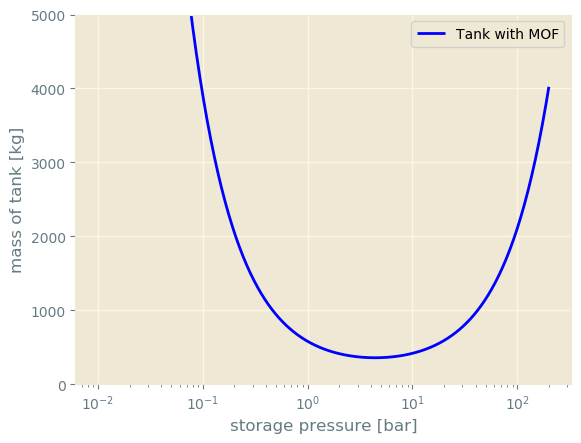

In [55]:
figure()
plot(P, m_tank_with_mof, color="blue", label="Tank with MOF")
#plot(P, m_tank, color=(215/255, 63/255, 9/255), label="Tank without MOF")
#plot(P, m_of_mof, color="yellow", label="MOF")
xlabel("storage pressure [bar]")
ylabel("mass of tank [kg]")
ax = gca()
ax.set_xscale("log")
ylim(0, 5000)
legend()
display()

In [56]:
minimum_mass_index = argmin(m_tank_with_mof)

308

In [57]:
P[minimum_mass_index]

4.373533096111158

In [58]:
r_tank_with_mof[minimum_mass_index]

4.557578462064337

In [59]:
t_tank_with_mof[minimum_mass_index]

0.0003559414328921745

In [60]:
m_of_mof[minimum_mass_index]

220.0817621461584

In [61]:
m_tank_with_mof[minimum_mass_index]

356.6576559470397

Optimum may come from saturation point of material.
Test MOFs with higher saturation points and see what matters.